## Business Understanding
Based on the available data seeing below, we asked ourselves the following questions:

1. The dependency between price and season
2. How well can we predict prices and what are the big contributing factors
3. The dependency between review comment's sentiment and season 
For answering these questions, we will use data from calendar, reviews and listings databases.

This notebook focuses on the first question. 
To answer this question, we'll clean the data and plot average prices per month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#create df for calendar.csv
df1 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\calendar.csv')
df1.head(300)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
295,241032,2016-10-25,t,$85.00
296,241032,2016-10-26,t,$85.00
297,241032,2016-10-27,t,$85.00
298,241032,2016-10-28,t,$85.00


In [2]:
#create df for listings.csv
pd.set_option('display.max_columns', None)
df2 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\listings.csv')
df2.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
#create df for reviews.csv
pd.set_option('display.max_columns', None)
df3 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\reviews.csv')
df3.head(30)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


Question 1: Is there a dependency between the price and the season?

## Data Preparation
Converting the data types into suitable types. Since price and month cannot be str type we add a column of price and month in float/integer type. 

In [4]:
#clean data 
print(df1.shape)
df1.head(30)
#check for rows with missing date values
print(df1['date'].isnull().mean()) 
#check for rows with missing listing ID values
print(df1['listing_id'].isnull().mean()) 
#check for rows with missing price values
print(df1['price'].isnull().mean())  
#32% of prices missing, remove rows with missing prices, as we don't want to impute prices which may not reflect the real price
df1=df1.dropna(subset=['price']) 




(1393570, 4)
0.0
0.0
0.32938998399793334


In [5]:
#add column for month
def label_month(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    int - integer, denoting the month extracted from row
    '''
    return int(row['date'][5]+row['date'][6])

df1['month']=df1.apply(lambda row: label_month(row), axis=1)



In [6]:
#add column for price as float

def float_price(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    float - float, denoting the price extracted from row
    '''
    str= row['price'][1:]
    str=str.replace(',', '')
    return float(str)
df1['float_price']=df1.apply(lambda row: float_price(row), axis=1)

## Data Modeling
Plot mean prices per month

[122.91217641714277, 124.29392670585507, 128.64448759798898, 135.09700540526322, 139.5381825911893, 147.47313707213505, 152.09414998248496, 150.65659423422008, 143.25594852807913, 137.03193915427352, 135.6887380777696, 137.2518349203432]


Text(0, 0.5, 'mean price in $')

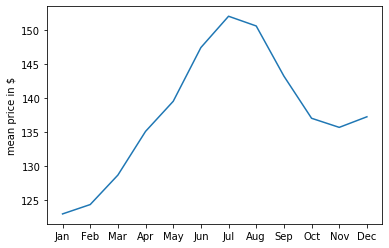

In [10]:
#plot average prices
monthly_avg_prices=[]
for i in range(0,12):
    monthly_avg_prices.append(df1[df1['month']==i+1]['float_price'].mean())
print(monthly_avg_prices)
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
plt.plot(months, monthly_avg_prices)
plt.ylabel('mean price in $')

The plot suggests increasing prices during summer and decreasing prices during winter with the exception of december. Why?

In [8]:
#create collumn for day december only
df_december=df1[df1['month']==12]
df_december.head(4)

#add column for day
def label_day(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    int - int, denoting the day extracted from row
    '''
    return int(row['date'][8]+row['date'][9])

df_december['day']=df_december.apply(lambda row: label_day(row), axis=1)




C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


[134.1539573545356, 140.73872248285818, 140.22033898305085, 133.39288281811648, 132.8132183908046, 132.49175035868006, 132.63333333333333, 135.11138968481376, 141.56211958467597, 141.1624329159213, 133.8536672629696, 133.1458184417441, 133.23222579492676, 133.31002497324295, 134.50195799216803, 140.79914681834342, 140.84085257548844, 134.93397231096912, 134.78850248403123, 134.78637331440737, 134.70876197233062, 136.73120567375886, 142.9128277817151, 142.83734939759037, 137.97490279250619, 137.89579653832567, 137.20416813846697, 137.17719731733146, 138.04550264550264, 144.73838028169016, 145.69814620496678]


Text(0.5, 1.0, 'daily mean prices in december')

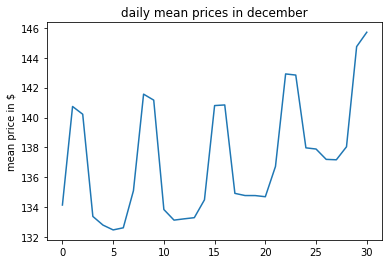

In [9]:
#plot daily prices in december
daily_avg_prices=[]
for i in range(0,31):
    daily_avg_prices.append(df_december[df_december['day']==i+1]['float_price'].mean())
print(daily_avg_prices)
days = range(0,31)
plt.plot(days, daily_avg_prices)
plt.ylabel('mean price in $')
plt.title('daily mean prices in december')

## Evaluation
Prices are dependent on seasonlity, the prices are highest during July.